# Predicting Bike Rentals

Bike sharing is now a common mean of transportation. This project investigates which model can predict bike rentals accurately. For that purpose, the dataset used compiles different information about bike rentals in the city of Washington D.C. The dataset can be downloaded from [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Some of the relevant columns are:
* `instant` - An ID for each row
* `dteday` - The date of the rentals
* `season` - The season. It can be:
    * `1`: spring
    * `2`: summer
    * `3`: fall
    * `4`: winter
* `year` - Year the rental occured. It can be:
    * `1`: 2011
    * `2`: 2012
* `mnth` - Month of the rental
* `hr` - Hour of the rental
* `holiday` - Whether it was a holiday or not
* `weekday` - The day of the week (1 to 7)
* `workingday` - Whether it was a working day or not
* `weathersit` - The weather. It can be:
    * `1`: Clear
    * `2`: Mist
    * `3`: Snow
    * `4`: Rain
* `temp` - Normalized temperature
* `atem` - Adjusted temperature
* `hum` - Normalized humidity
* `windspeed` - Normalized wind speed
* `casual` - Number of people renting a bike without being signed up
* `registered` - Number of people renting a bike and being registered
* `cnt` - Total number of bike rentals (`casual` + `registered`)

**Objective:** The objective is to identify the best machine learning model to predict the total number of bike rentals for a given time of the day.

**Techniques used:**
* Pandas, matplotlib
* Linear regression
* Decision tree regressor
* Random forest regressor

In [1]:
import pandas as pd

bike_rentals = pd.read_csv('bike_rental_hour.csv')

bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

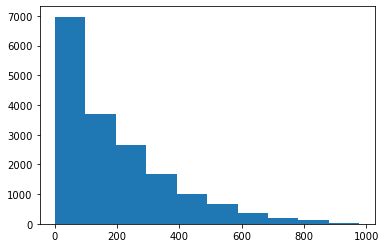

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(bike_rentals['cnt'])

In [3]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [4]:
def assign_label(hour):
    if hour >= 0 and hour < 6:
        return 4
    elif hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <= 24:
        return 3

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


## Error Metric

The MSE will be used an error metric, because it applies to continuous numeric data, just like the present dataset.

In [5]:
train = bike_rentals.sample(frac = 0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove('cnt')
predictors.remove('casual')
predictors.remove('dteday')
predictors.remove('registered')

reg = LinearRegression()

reg.fit(train[predictors], train['cnt'])

LinearRegression()

In [7]:
import numpy as np

prediction = reg.predict(test[predictors])

mse = np.mean((prediction - test['cnt']) ** 2)

mse

17232.523875916722

The error is very large and it might be due to some extreme values in the dataset. If there are some high rental counts, the MSE will be greatly penalized, leading to a very large error.

## Decision Tree Regressor

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(min_samples_leaf = 5)
tree1.fit(train[predictors], train['cnt'])
pred1 = tree1.predict(test[predictors])
mse1 = np.mean((pred1 - test['cnt']) ** 2)

tree2 = DecisionTreeRegressor(min_samples_leaf = 2)
tree2.fit(train[predictors], train['cnt'])
pred2 = tree2.predict(test[predictors])
mse2 = np.mean((pred2 - test['cnt']) ** 2)

print(mse1, mse2)

2510.069432282397 2686.816327835313


Using a decision tree led to a significant decrease in the MSE.

## Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf = 5)
forest.fit(train[predictors], train['cnt'])
pred = forest.predict(test[predictors])
mse = np.mean((pred - test['cnt']) ** 2)

mse

1827.6065078741794

Random forest, unlike a deicison tree, will tend to overfit less. Therefore, a reduced MSE is obtained on the testing dataset, effectively improving accuracy.